In [41]:
%matplotlib notebook

from DataSets import *
from matplotlib import pyplot as plt


from DataSets import *
from MalardClient.MalardClient import MalardClient
from MalardClient.DataSet import DataSet
from MalardClient.DataSetQuery import DataSetQuery
import pandas as pd
import geopandas as gp
import json
# import rasterio
# from rasterio.mask import mask
# import geopandas as gpd
# shapefile = gpd.read_file("extraction.shp")
# # extract the geometry in GeoJSON format
# geoms = shapefile.geometry.values # list of shapely geometries
# geometry = geoms[0] # shapely geometry
# # transform to GeJSON format
# from shapely.geometry import mapping
# geoms = [mapping(geoms[0])]
# # extract the raster values values within the polygon 
# with rasterio.open("raster.tif") as src:
#      out_image, out_transform = mask(src, geoms, crop=True)

In [55]:
minX = 500000
maxX = 600000
minY = 0
maxY = 100000
size = maxX-minX
raster = "/data/puma1/scratch/mtngla/dems/HMA_TDX_Masked_SRTM_Merged_coreg_aea_clip.tif"
raster = RasterDataSet(raster)

In [56]:
raster.cutToBbx(minX, maxX, minY, maxY)

In [57]:
# values is now the elevations
xy, values = raster.getCenterPoints()

In [85]:
help(client)

Help on MalardClient in module MalardClient.MalardClient object:

class MalardClient(builtins.object)
 |  MalardClient(environmentName='DEVv2', notebook=True)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, environmentName='DEVv2', notebook=True)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  boundingBox(self, dataSet)
 |  
 |  executeQuery(self, dataSet, boundingBox, projections=[], filters=[], xCol='x', yCol='y', maskFilters=[])
 |  
 |  executeQueryPolygon(self, dataSet, minT, maxT, extentFilter, maskFilters=[], projections=[], filters=[], xCol='x', yCol='y')
 |  
 |  filterGriddedPoints(self, minX, maxX, minY, maxY, maskFilters, resolution)
 |  
 |  getDataSets(self, parentDataSet)
 |  
 |  getParentDataSets(self)
 |  
 |  getProjection(self, dataSet)
 |  
 |  getSwathNamesFromIds(self, dataset, file_ids)
 |  
 |  gridCells(self, dataSet, boundingBox, xCol='x', yCol='y')
 |  
 |  gridCellsWithinPolygon(self, dataSet, minT, maxT, extentFilter,

In [59]:
client = MalardClient()
parentDs = "mtngla"
inputDataSet = "ReadyHim2"
region = "himalayas"
dataSet = DataSet(parentDs=parentDs, dataSet=inputDataSet, region=region)
projection = client.getProjection(dataSet).proj4

#bbx = client.boundingBox(dataSet)
#minT = bbx.minT
#maxT = bbx.maxT

In [73]:
points = PointDataSet(pd.DataFrame(zip(np.transpose(xy)[0],np.transpose(xy)[1],values), columns=['x', 'y', 'elev']),projection)

In [63]:
points.data

,x,y,elev
0,499995.0,100035.0,4826.793457
1,500085.0,100035.0,4847.080566
2,500175.0,100035.0,4869.775391
3,500265.0,100035.0,4893.370117
4,500355.0,100035.0,4918.929688
5,500445.0,100035.0,4939.861328
6,500535.0,100035.0,4962.263184
7,500625.0,100035.0,4990.444824
8,500715.0,100035.0,5018.988281
9,500805.0,100035.0,5048.789062


In [74]:
geoPoints = points.asGeoDataSet()

In [75]:
geoPoints.data.shape[0]

1234321

In [76]:
# Apply masks
maskDataSet = "RGIv60"
maskType = 'Glacier'
query_sync = DataSetQuery("http://localhost:9000")
mGla = query_sync.getGridCellMask(parentDs, maskDataSet, maskType, region, minX, minY, size)
maskDataSetFile = json.loads(mGla)['fileName']
maskDataSetFile
#geoPoints.applyMask(maskDataSetFile, maskType)

'/data/puma1/scratch/v2/malard/mask/mtngla/static/RGIv60/Glacier/himalayas/cell_x500000_y0_s100000/mask_Glacier_x500000_y0_s100000.gpkg'

In [77]:
print('before ', geoPoints.data.shape[0])
geoPoints.applyMask(maskDataSetFile, maskType)
print('after ', geoPoints.data.shape[0])

before  1234321
after  94067


<IPython.core.display.Javascript object>


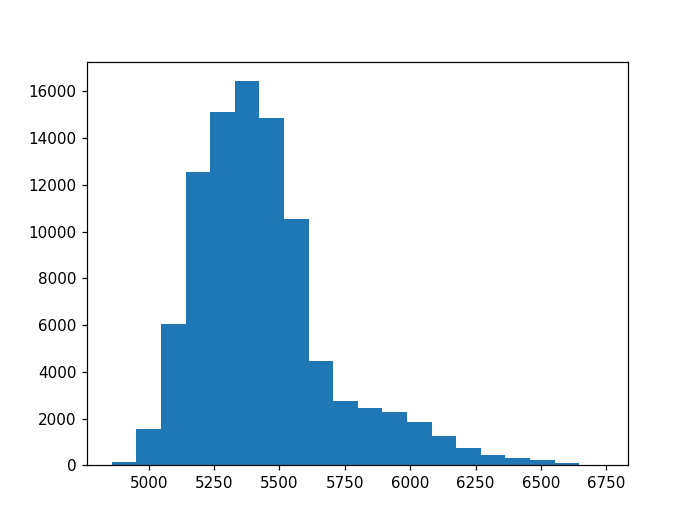

(array([  128.,  1566.,  6064., 12528., 15126., 16423., 14851., 10537.,
         4464.,  2739.,  2439.,  2266.,  1847.,  1246.,   731.,   465.,
          317.,   210.,    93.,    27.]),
 array([4859.06591797, 4953.12329102, 5047.18066406, 5141.23803711,
        5235.29541016, 5329.3527832 , 5423.41015625, 5517.4675293 ,
        5611.52490234, 5705.58227539, 5799.63964844, 5893.69702148,
        5987.75439453, 6081.81176758, 6175.86914062, 6269.92651367,
        6363.98388672, 6458.04125977, 6552.09863281, 6646.15600586,
        6740.21337891]),
 <a list of 20 Patch objects>)

In [83]:
%matplotlib notebook
plt.hist(geoPoints.data['elev'],bins=20)